<a href="https://colab.research.google.com/github/LalithaEvani/Madhumeha/blob/main/coronary_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CORONARY HEART DISEASE PREDICTION AFTER DIAGNOSIS OF DIABETES**

Dataset used
From January 2017 till June 2019, 1,357 subjects with T2DM were recruited in the study. Patients with T2DM were recruited from the Inpatient Department of Endocrinology in Lu He hospital

https://www.nature.com/articles/s41598-020-71321-2

AI model to determine the risk of T2DM patients to develop to CHD(Coronary Heart Disease), which has potential value in providing early warning personalized guidance of CHD risk for both T2DM patients and clinicians.

CHD is a disease of the less blood supplying to heart muscle vessels11 manifested as hyperlipidaemia, myocardial infarction, and angina pectoris

It is known that individuals’ basic information like gender and age, and blood test indexes such as blood pressure, total cholesterol (TC), low-density lipoprotein cholesterol (LDL-C), high-density lipoprotein cholesterol (HDL-C) as well as smoking behaviour, diabetes status can be considered as risk factors of causing CHD

AI (random forest) based model to predict the risk of developing CHD for individuals with T2DM

the predictive model achieved an AUC of 0.77 (fivefold cross-validation) in the training dataset and an AUC of 0.80 in the testing dataset, respectively. Moreover, the model achieved an AUC of 0.71 on a totally independent dataset including 1,253 newly recruited T2DM patients.

table containing range parameters for data considered 

https://www.nature.com/articles/s41598-020-71321-2/tables/1 

we use the information entropy function and Gini impurity function to check the information hidden in each feature. One feature will get a higher score if this series of data contain more information for classification and vice versa. The information entropy function-based feature selection method is implemented by using random forest model with 500 decision trees in sci-kit-learn 0.2228 in Python 3.

Webserver based prediction 

https://www.cuilab.cn/dchd/#single

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

In [2]:
gender1= np.random.choice([0,1], size=7610, p=[0.482,0.518]) #0 for female 
gender2 = np.random.choice([0,1], size=2390, p=[0.470,0.530]) 
gender = np.concatenate((gender1,gender2))
gender

array([0, 1, 0, ..., 0, 0, 0])

In [3]:
smokers1= np.random.choice([1,0], size=7610, p=[0.381,0.619])
smokers2= np.random.choice([1,0], size=2390, p=[0.424,0.576])
smokers = np.concatenate((smokers1,smokers2))
print(smokers)


[0 0 1 ... 1 1 1]


In [4]:
drinking_alcohol1= np.random.choice([1,0], size=7610, p=[0.318,0.682])
drinking_alcohol2= np.random.choice([1,0], size=2390, p=[0.319,0.681])
drinking_alcohol = np.concatenate((drinking_alcohol1,drinking_alcohol2))
print(drinking_alcohol)

[0 0 0 ... 0 0 1]


In [5]:
age1 = np.random.uniform(39.77,68.37,7610)
age2 = np.random.uniform(55.16,74.66,2390)
age = np.concatenate((age1,age2))
age

array([61.46040915, 56.19390059, 49.61827599, ..., 64.89308613,
       64.76033265, 56.58226185])

In [6]:
course_of_hypertension1 = np.random.uniform(4.92,5.98,7610)
course_of_hypertension2 = np.random.uniform(9.10,11.55,2390)
course_of_hypertension = np.concatenate((course_of_hypertension1, course_of_hypertension2))
course_of_hypertension

array([5.31253333, 5.05898696, 5.26548947, ..., 9.90982231, 9.77971594,
       9.45181043])

In [7]:
course_of_diabetes1 = np.random.uniform(6.80,7.73,7610)
course_of_diabetes2= np.random.uniform(10.38,12.36,2390)
course_of_diabetes = np.concatenate((course_of_diabetes1,course_of_diabetes2))
course_of_diabetes

array([ 7.32521002,  7.59976366,  7.3352454 , ..., 11.83328666,
       11.74072253, 11.84732216])

In [8]:
systolic_pressure1 = np.random.uniform(110.26,147.74,7610)
systolic_pressure2= np.random.uniform(107.74,149.62,2390)
systolic_pressure = np.concatenate((systolic_pressure1,systolic_pressure2))
systolic_pressure

array([126.07520652, 135.8265084 , 129.87057877, ..., 122.43757116,
       108.24379966, 148.31900765])

In [9]:
diastolic_pressure1 = np.random.uniform(65.5, 88.72,7610)
diastolic_pressure2 = np.random.uniform(60.1,85.5,2390)
diastolic_pressure = np.concatenate((diastolic_pressure1,diastolic_pressure2))
diastolic_pressure

array([82.33432996, 82.3229957 , 76.12284721, ..., 77.38576049,
       73.79502339, 73.22339177])

In [10]:
heartrate1 = np.random.uniform(70.45,96.39,7610)
heartrate2 = np.random.uniform(65.81,88.07,2390)
heartrate = np.concatenate((heartrate1,heartrate2))
heartrate

array([81.45505598, 79.52287539, 87.27063417, ..., 84.20825621,
       80.41813198, 77.09802771])

In [11]:
body_mass_index1 = np.random.uniform(22.08,30.16,7610)
body_mass_index2 = np.random.uniform(22.66,30.01,2390)
body_mass_index = np.concatenate((body_mass_index1,body_mass_index2))
body_mass_index

array([25.84966629, 24.50405324, 28.19506402, ..., 24.97267663,
       28.91534394, 23.6298533 ])

In [12]:
waist_hip_rate1 = np.random.uniform(0.87,1.01,7610)
waist_hip_rate2 = np.random.uniform(0.88,1.02,2390)
waist_hip_rate = np.concatenate((waist_hip_rate1,waist_hip_rate2))
waist_hip_rate

array([0.98181108, 0.98126257, 0.93942772, ..., 0.89257261, 0.89521418,
       0.95261102])

In [13]:
blood_platelet1 = np.random.uniform(156.47,294.29,7610)
blood_platelet2 = np.random.uniform(112.42,287.86,2390)
blood_platelet = np.concatenate((blood_platelet1,blood_platelet2))
blood_platelet

array([255.51991077, 192.8263423 , 284.87043753, ..., 255.76708878,
       141.8479107 , 177.25450806])

In [14]:
hemoglobin1 = np.random.uniform(7.56,12.12,7610)
hemoglobin2 = np.random.uniform(7.18,11.58,2390)
hemoglobin = np.concatenate((hemoglobin1,hemoglobin2))
hemoglobin

array([ 8.45834195,  8.04850118, 11.72290077, ...,  8.88382299,
        7.60022767,  7.99983838])

In [15]:
serum_creatinine1 = np.random.uniform(39.59,94.91,7610)
serum_creatinine2 = np.random.uniform(44.24,108.18,2390)
serum_creatinine = np.concatenate((serum_creatinine1,serum_creatinine2))
serum_creatinine

array([ 48.52209909,  92.87020072,  46.83942472, ..., 103.1285966 ,
        85.13581636,  92.23943065])

In [16]:
uric_acid1 = np.random.uniform(312.95,326.53,7610)
uric_acid2 = np.random.uniform(321.41,346.41,2390)
uric_acid = np.concatenate((uric_acid1,uric_acid2))
uric_acid

array([323.2626845 , 321.88504643, 318.64158915, ..., 343.46961891,
       338.92786511, 342.6169182 ])

In [17]:
serum_triglyceride1 = np.random.uniform(1.88,2.17,7610)
serum_triglyceride2 = np.random.uniform(1.58,1.95,2390)
serum_triglyceride = np.concatenate((serum_triglyceride1,serum_triglyceride2))
serum_triglyceride

array([2.09090515, 1.94963633, 1.934604  , ..., 1.78715161, 1.67747099,
       1.79649223])

In [18]:
total_cholesterol1 = np.random.uniform(3.5,5.92,7610)
total_cholesterol2 = np.random.uniform(2.96,5.3,2390)
total_cholesterol = np.concatenate((total_cholesterol1,total_cholesterol2))
total_cholesterol

array([3.95899613, 5.04190724, 5.04441888, ..., 3.18817428, 4.63240107,
       4.60752969])

In [19]:
LDL_cholesterol1 = np.random.uniform(2.14,3.9,7610)
LDL_cholesterol2 = np.random.uniform(1.7,3.44,2390)
LDL_cholesterol = np.concatenate((LDL_cholesterol1,LDL_cholesterol2))
LDL_cholesterol

array([2.30663998, 2.47972106, 2.78056036, ..., 2.38643743, 2.34919113,
       3.41632853])

In [20]:
HDL_cholesterol1 = np.random.uniform(0.81,1.35,7610)
HDL_cholesterol2 = np.random.uniform(0.76,1.32,2390)
HDL_cholesterol = np.concatenate((HDL_cholesterol1,HDL_cholesterol2))
HDL_cholesterol

array([0.91595336, 0.93595468, 1.17376136, ..., 1.09762426, 0.8121341 ,
       0.89290602])

In [21]:
fasting_blood_glucose1 = np.random.uniform(8.78,9.38,7610)
fasting_blood_glucose2 = np.random.uniform(8.15,9.08,2390)
fasting_blood_glucose = np.concatenate((fasting_blood_glucose1,fasting_blood_glucose2))
fasting_blood_glucose

array([9.16770898, 9.07125158, 9.17094604, ..., 8.49662713, 8.9022222 ,
       8.70920847])

In [22]:
insulin0h1 = np.random.uniform(14.26,21.60,7610)
insulin0h2 = np.random.uniform(18.98,40.30,2390)
insulin0h = np.concatenate((insulin0h1,insulin0h2))
insulin0h

array([15.42619372, 19.29881881, 16.70219583, ..., 32.58416355,
       33.554307  , 35.61569878])

In [23]:
insulin1h1 = np.random.uniform(53.64,64.38,7610)
insulin1h2 = np.random.uniform(64.38,93.06,2390)
insulin1h = np.concatenate((insulin1h1,insulin1h2))
insulin1h

array([63.50483241, 59.69272704, 57.01973713, ..., 84.75116136,
       79.24831274, 80.21157336])

In [24]:
insulin2h1 = np.random.uniform(59.82,70.36,7610)
insulin2h2 = np.random.uniform(69.47,100.19,2390)
insulin2h = np.concatenate((insulin2h1,insulin2h2))
insulin2h

array([68.94681509, 66.70253264, 64.15081856, ..., 71.71920001,
       92.50885612, 93.93095436])

In [25]:
insulin3h1 = np.random.uniform(48.16,58.52,7610)
insulin3h2 = np.random.uniform(60.06,90.87,2390)
insulin3h = np.concatenate((insulin3h1,insulin3h2))
insulin3h

array([53.88571219, 53.9467407 , 55.79235933, ..., 75.7531046 ,
       73.18520917, 87.80268786])

In [26]:
cpeptide0h1 = np.random.uniform(1.51,1.64,7610)
cpeptide0h2 = np.random.uniform(1.68,1.95,2390)
cpeptide0h = np.concatenate((cpeptide0h1,cpeptide0h2))
cpeptide0h 

array([1.57070016, 1.51177078, 1.55182683, ..., 1.88210232, 1.82509458,
       1.89508272])

In [27]:
cpeptide1h1 = np.random.uniform(2.63,2.88,7610)
cpeptide1h2 = np.random.uniform(2.62,3.01,2390)
cpeptide1h = np.concatenate((cpeptide1h1,cpeptide1h2))
cpeptide1h

array([2.72957856, 2.78738713, 2.68215521, ..., 2.66510167, 2.84813766,
       2.91639102])

In [28]:
cpeptide2h1 = np.random.uniform(3.94,4.33,7610)
cpeptide2h2 = np.random.uniform(3.84,4.48,2390)
cpeptide2h = np.concatenate((cpeptide2h1,cpeptide2h2))
cpeptide2h

array([4.19530189, 3.94396278, 4.19261618, ..., 4.02958756, 4.09551795,
       4.36806919])

In [29]:
cpeptide3h1 = np.random.uniform(4.05,4.44,7610)
cpeptide3h2 = np.random.uniform(4.14,4.86,2390)
cpeptide3h = np.concatenate((cpeptide3h1,cpeptide3h2))
cpeptide3h

array([4.07751409, 4.36152741, 4.29951812, ..., 4.61429217, 4.60894026,
       4.48639562])

In [30]:

label1 = np.array([0 for i in range(7610)])
label2 = np.array([1 for i in range(2390)])
label = np.concatenate((label1,label2))
label


array([0, 0, 0, ..., 1, 1, 1])

In [31]:
data = pd.DataFrame()

# defining the columns of the dataset
data['gender'] = gender
data['smokers'] = smokers
data['drinking alcohol'] = drinking_alcohol
data['age'] = age
data['course of hypertension'] = course_of_hypertension
data['course of diabetes'] = course_of_diabetes
data['systolic pressure'] = systolic_pressure
data['diastolic pressure'] = diastolic_pressure
data['heartrate'] = heartrate
data['body mass index'] = body_mass_index
data['waist hip rate'] = waist_hip_rate
data['blood platelet'] = blood_platelet
data['hemoglobin'] = hemoglobin
data['serum creatinine'] = serum_creatinine
data['uric acid'] = uric_acid
data['serum triglyceride'] = serum_triglyceride
data['total cholesterol'] = total_cholesterol
data['LDL cholesterol'] = LDL_cholesterol
data['HDL cholesterol'] = HDL_cholesterol
data['fasting blood glucose'] = fasting_blood_glucose
data['insulin 0 h'] = insulin0h
data['insulin 1 h'] = insulin1h
data['insulin 2 h'] = insulin2h
data['insulin 3 h'] = insulin3h
data['c-peptide 0 h'] = cpeptide0h
data['c-peptide 1 h'] = cpeptide1h
data['c-peptide 2 h'] = cpeptide2h
data['c-peptide 3 h'] = cpeptide3h
data['label'] = label

data

,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,body mass index,...,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h,label
0,0,0,0,61.460409,5.312533,7.325210,126.075207,82.334330,81.455056,25.849666,...,9.167709,15.426194,63.504832,68.946815,53.885712,1.570700,2.729579,4.195302,4.077514,0
1,1,0,0,56.193901,5.058987,7.599764,135.826508,82.322996,79.522875,24.504053,...,9.071252,19.298819,59.692727,66.702533,53.946741,1.511771,2.787387,3.943963,4.361527,0
2,0,1,0,49.618276,5.265489,7.335245,129.870579,76.122847,87.270634,28.195064,...,9.170946,16.702196,57.019737,64.150819,55.792359,1.551827,2.682155,4.192616,4.299518,0
3,0,0,0,66.112048,5.293670,7.633262,147.461545,81.503426,79.595937,29.310285,...,9.044220,20.948583,60.506276,64.352533,54.508277,1.633631,2.681531,4.049705,4.159086,0
4,1,1,0,40.392755,5.488646,7.603260,145.768080,72.060602,86.343201,27.897819,...,9.011310,15.606109,61.102153,66.415967,56.568484,1.565710,2.687178,4.291213,4.377429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,70.688712,11.346265,12.107343,123.032563,84.541481,79.095115,24.703802,...,8.174999,36.831668,76.363251,81.500043,75.607195,1.904162,2.863141,4.100613,4.748569,1
9996,1,0,0,59.966538,11.055248,11.340356,128.036693,75.681052,75.410863,28.776875,...,8.359785,39.704079,82.206952,93.910309,80.573813,1.872065,2.705064,4.028484,4.717235,1
9997,0,1,0,64.893086,9.909822,11.833287,122.437571,77.385760,84.208256,24.972677,...,8.496627,32.584164,84.751161,71.719200,75.753105,1.882102,2.665102,4.029588,4.614292,1
9998,0,1,0,64.760333,9.779716,11.740723,108.243800,73.795023,80.418132,28.915344,...,8.902222,33.554307,79.248313,92.508856,73.185209,1.825095,2.848138,4.095518,4.608940,1


In [32]:
cardio_data = data.sample(frac=1)
cardio_data.reset_index(inplace= True, drop = True)
cardio_data

,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,body mass index,...,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h,label
0,1,0,0,41.554169,5.885118,7.554532,124.435193,82.968678,94.592925,27.052989,...,9.055292,17.036725,57.161556,68.628304,48.211728,1.550686,2.847640,4.125536,4.263660,0
1,0,0,0,52.128990,5.197976,7.452325,132.893036,70.505069,71.146863,30.128089,...,9.125392,18.430249,62.720307,65.165295,57.530178,1.575297,2.749015,3.974679,4.129286,0
2,1,1,1,65.992345,5.112596,7.505223,113.935751,71.001220,90.599790,26.822461,...,9.024769,17.848891,60.362387,62.828340,51.173314,1.565908,2.720375,3.970204,4.217797,0
3,1,0,1,48.291986,5.574803,7.452598,137.792496,74.295426,89.378551,28.373655,...,8.838971,15.665235,63.419291,68.646028,48.390209,1.574326,2.786001,4.271198,4.237962,0
4,0,1,0,56.768217,9.558070,10.553221,113.974594,77.533520,78.651623,29.048602,...,8.953390,27.643796,75.443893,94.247108,80.564488,1.815454,2.954379,3.897618,4.638664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,42.593137,5.474118,7.347942,133.946049,67.143215,84.113746,28.315942,...,9.043462,14.943343,63.400202,68.319428,56.541290,1.618079,2.649991,4.207132,4.398304,0
9996,0,0,0,55.707294,5.808160,7.232560,123.906569,75.981684,76.194455,25.576598,...,9.163206,18.016206,56.873040,70.064167,50.492185,1.552809,2.633352,4.147641,4.273098,0
9997,0,1,0,41.910351,5.040293,7.581940,141.336211,81.184474,86.575614,29.534924,...,9.193006,18.122095,55.237473,66.087097,52.616498,1.632571,2.760102,3.983381,4.409607,0
9998,0,0,0,41.961436,4.952439,7.345690,121.858153,68.831109,71.232712,25.249868,...,9.048312,16.090797,55.480089,66.770973,52.846916,1.556106,2.756941,4.065636,4.067273,0


In [33]:
cardio_data.to_csv('cardiovascular.csv')

In [34]:
import pandas as pd
cardio = pd.read_csv('/content/cardiovascular.csv')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
cardio_validate = pd.read_csv('/content/drive/MyDrive/cardiovascular.csv')



---


**Random Forest**

---



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cardio_data = pd.DataFrame(cardio ,columns=cardio.columns[:-1])
cardio_label = cardio.label
X_train, X_test, y_train, y_test = train_test_split(cardio_data, cardio_label, test_size = 0.30, random_state = 17) 

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

#Training Error in terms of points:
from sklearn.metrics import accuracy_score
print("{:.2f} % of the testing points classified correctly".format(100*accuracy_score(clf.predict(X_test), y_test)))

cardio_validate_data = pd.DataFrame(cardio_validate,columns = cardio_validate.columns[:-1])
cardio_validate_label = cardio_validate.label
print("accuracy of validation",100*accuracy_score(clf.predict(cardio_validate_data),cardio_validate_label))

100.00 % of the testing points classified correctly
accuracy of validation 100.0




---

**KNN**


---



In [49]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
scores_list = []
  
for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

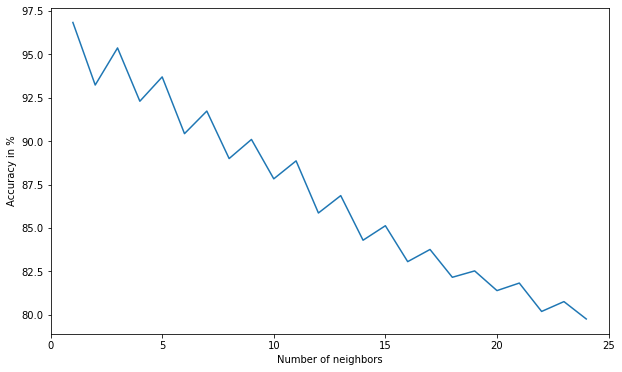

In [50]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [51]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.83333333333334
[1]




---
SVM


---




In [52]:
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7633


In [53]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9987


In [54]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9997


In [55]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [56]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [57]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 1.0000


In [58]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7633


In [59]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9123


In [60]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6280


In [61]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.6247
